# Import libraries

In [1]:
#import required libraries
import pandas as pd
import re #for data cleaning
import html
import itertools
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
from pandas import DataFrame
import matplotlib.pyplot as plt
from wordcloud import WordCloud # For WordCloud plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pylab as pl
from io import StringIO
from sklearn import svm

# 1.Data Cleaning

-map function has been used to implement data cleaning

-lambda function has been used as well

-the tweets should be empty after the cleaning

In [2]:
# Loading the stop_word.txt file for removing the stop words
stop_words = open('stop_words.txt').read().split()
stop_words = r'\b(?:{})\b'.format('|'.join(stop_words))


In [3]:
stop_words

"\\b(?:a|able|about|above|abst|accordance|according|accordingly|across|act|actually|added|adj|affected|affecting|affects|after|afterwards|again|against|ah|all|almost|alone|along|already|also|although|always|am|among|amongst|an|and|announce|another|any|anybody|anyhow|anymore|anyone|anything|anyway|anyways|anywhere|apparently|approximately|are|aren|arent|arise|around|as|aside|ask|asking|at|auth|available|away|awfully|b|back|be|became|because|become|becomes|becoming|been|before|beforehand|begin|beginning|beginnings|begins|behind|being|believe|below|beside|besides|between|beyond|biol|both|brief|briefly|but|by|c|ca|came|can|cannot|can't|cause|causes|certain|certainly|co|com|come|comes|contain|containing|contains|could|couldnt|d|date|did|didn't|different|do|does|doesn't|doing|done|don't|down|downwards|due|during|e|each|ed|edu|effect|eg|eight|eighty|either|else|elsewhere|end|ending|enough|especially|et|et-al|etc|even|ever|every|everybody|everyone|everything|everywhere|ex|except|f|far|few|ff|f

In [4]:
#define a data cleaning function in order to satisfy all of the cleaning 
def data_cleaning(filename):

    # File reading done by Panda dataframe
    df = pd.read_csv(filename, sep=",")
    
    # Replace the HTML character codes with ASCII equvivalent  
    df['text'] = df['text'].map(lambda x: html.unescape(x))
    
    # Remove HTML tags and attributes
    df['text'] = df['text'].map(lambda x: re.sub(r'<[^>]+>', '', x))
    
    # Remove URLs
    df['text'] = df['text'].map(lambda x: re.sub(r'http\S+', '', x))
    
    # Lower the characters
    df['text'] = df['text'].map(lambda x: x.lower())
        
    # Get the hashtags, words after @
    hashtag = df['text'].map(lambda x: re.findall('@(?=\w+)\w+',x))
    
    # Remove the stop words
    df['text'] = df['text'].str.replace(stop_words, '')
    
    # Remove punctuations
    df['text'] = df['text'].map(lambda x: re.sub(r'[^\w\s]','',x))
    
    # Remove spaces
    df['text'] = df['text'].map(lambda x: x.strip())
    
    # Remove the word after @
    df['text'] = df['text'].map(lambda x: re.sub(r'@(?=\w+)\w+','',x))
    
    return list(df['text']), list(hashtag)

# 2.Exploratory Analysis

In [5]:
#implement the cleaning
cleaned_data,hashtag = data_cleaning('US_airline_tweets.csv')
hashtag #check the hashtag

[['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica', '@australia'],
 ['@virginamerica', '@virginmedia'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica', '@pacificbiznews'],
 ['@virginamerica'],
 ['@virginamerica', '@freddieawards'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica',
  '@ladygaga',
  '@carrieunderwood',
  '@ladygaga',
  '@carrieunderwood'],
 ['@virginamerica'],
 ['@virginamerica'],
 ['@virginamerica', '@ladygaga', '@carrieunderwood'],
 ['@virginamerica'],
 ['@vir

In [6]:
cleaned_data #check the cleaned data

['virginamerica    commercials   experience tacky',
 'virginamerica   aggressive  blast obnoxious entertainment   guests faces     recourse',
 'virginamerica     big bad thing',
 'virginamerica seriously  pay 30  flight  seats     playing\n    bad thing  flying va',
 'virginamerica    time  fly vx  âœear wormâ wonâ',
 'virginamerica well  didntâ',
 'virginamerica   amazing  arrived  hour early   good',
 'virginamerica  3 pretty graphics   better  minimal iconography',
 'virginamerica     great deal  thinking   2nd trip  australia        1st trip',
 'virginamerica virginmedia  flying  fabulous seductive skies      stress   travel',
 'virginamerica',
 'virginamerica sfopdx schedule   mia',
 'virginamerica  excited    cross country flight lax  mco  heard   great things  virgin america 29daystogo',
 'virginamerica   flew  nyc  sfo  week  couldn fully sit   seat    large gentleman   side   help',
 'âï flying virginamerica âºïðÿ',
 'virginamerica      amazingly awesome bosfll     fly',
 'vir

In [7]:
len(hashtag)

11541

In [8]:
#from list of list to a list.
tag1 = list(set(list(itertools.chain.from_iterable(hashtag))))#repeated tags have been removed
#remove @
tag = [x.strip('@') for x in tag1]
tag

['etihad',
 'jack_kairys',
 'unitedairlines',
 'unfriendly',
 'theairhelper',
 'jameswester',
 'bet',
 'flyyow',
 'jhughes1025',
 'benjaminokeefe',
 'olive201',
 'alstdi',
 'vincenzolandino',
 'bbb_media',
 'australia',
 'ba_usa',
 'priceline',
 'jimtrotter_nfl',
 'keithlaw',
 'airlineadviser',
 'barclaycardus',
 'annettenaif',
 'carlw1980',
 'megzezzo',
 'emrey35',
 'wikipearl',
 'apollochplayers',
 'saharasams',
 'aarp',
 'leinenkugels',
 'dartmedia',
 'samoore10',
 'cbsphilly',
 'virginmedia',
 'cosmopolitan',
 '0xjared',
 'bdl',
 'scm1133',
 'kylejudah',
 'traveloneworld',
 't5sparrow',
 'brandssayingbae',
 'fastcompany',
 'av_duffy',
 'usairwayscenter',
 'dadboner',
 'chicagosmayor',
 'philpete',
 'citi',
 'caexhibitions',
 'spiritairlines',
 'nokidhungry',
 'foxnews',
 'loganairports',
 'kaps12',
 'souljacoy',
 'specialolympics',
 'naia_miaa',
 'hoagy10',
 'lesliewolfson',
 'cobedien',
 'codycleverly',
 'joyadventuremom',
 'ciscojimfrench',
 'walls29',
 'maatkare67',
 'bradley_ai

Determine the airlines

for determining the airline of a tweet, one can check the hashtag to get the info

Here, I wanted to find the frequency of the airline in order to find the distribution

In [9]:
#read the csv file
df = pd.read_csv('US_airline_tweets.csv', sep=",")
#lower cases
df['text'] = df['text'].map(lambda x: x.lower())
#remove punctuation
df['text'] = df['text'].map(lambda x: re.sub(r'[^\w\s]','',x))
#remove stop words
df['text'] = df['text'].str.replace(stop_words, '')

In [10]:
df.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica youve commercials experience...
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious en...
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay 30 flight seats...
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx âœear wormâ won...


In [11]:
df.text[0].split()[0] #locate a word in dataframe

'virginamerica'

In [12]:
# Counting the occurances of each extraceted airline names in the Panda dataframe
count = 0
freq = dict()

for j in tag: #count the total number for each tag
    for i in df.text: #for each tweet
        for l in i.split(): # for each word in each tweet
              if l == j: #if the word match the selected tag, then count+1
                    count = count + 1
    freq[j] = str(count) # shows the total amount of each tag
    count = 0 # reset count 
freq

{'etihad': '2',
 'jack_kairys': '3',
 'unitedairlines': '42',
 'unfriendly': '7',
 'theairhelper': '1',
 'jameswester': '1',
 'bet': '7',
 'flyyow': '2',
 'jhughes1025': '1',
 'benjaminokeefe': '1',
 'olive201': '1',
 'alstdi': '1',
 'vincenzolandino': '1',
 'bbb_media': '1',
 'australia': '1',
 'ba_usa': '1',
 'priceline': '1',
 'jimtrotter_nfl': '1',
 'keithlaw': '1',
 'airlineadviser': '1',
 'barclaycardus': '1',
 'annettenaif': '1',
 'carlw1980': '1',
 'megzezzo': '1',
 'emrey35': '1',
 'wikipearl': '1',
 'apollochplayers': '1',
 'saharasams': '1',
 'aarp': '3',
 'leinenkugels': '2',
 'dartmedia': '1',
 'samoore10': '1',
 'cbsphilly': '1',
 'virginmedia': '1',
 'cosmopolitan': '1',
 '0xjared': '0',
 'bdl': '10',
 'scm1133': '1',
 'kylejudah': '4',
 'traveloneworld': '1',
 't5sparrow': '1',
 'brandssayingbae': '1',
 'fastcompany': '0',
 'av_duffy': '1',
 'usairwayscenter': '1',
 'dadboner': '1',
 'chicagosmayor': '1',
 'philpete': '1',
 'citi': '1',
 'caexhibitions': '1',
 'spiritai

Check the freq, too much useless info with low frequency

so that I filtered this low-frequency tags by setting the lowest frequency >= 300.

In [13]:
# Remove the low frequency tags, hopefully, the rest of the words is right.
airlines = dict((k, v) for k, v in freq.items() if int(v) >= 300)
airlines

{'virginamerica': '343',
 'southwestair': '1778',
 'jetblue': '1610',
 'usairways': '2641',
 'united': '3390',
 'americanair': '2443'}

I think the results are all airlines and a brief distribution can be obtained.

Text(0.5, 1.0, 'the Distribution of the US Airlines of the Tweets')

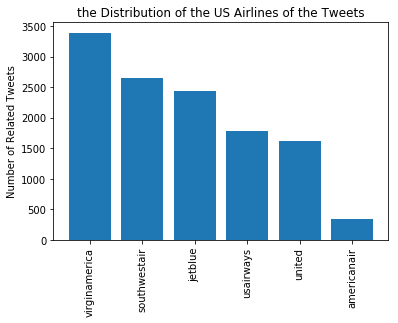

In [14]:
#Plot the distribution of tweets about each US airlines.
x = ['united',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'virginamerica']
y = [3390,2641,2443,1778,1610,342]
#Here I manually defined x and y since if I use a dict (airlines) to plot, the plot seems weird.
ind = np.arange(6)
plt.bar(x,y)
plt.xticks(ind, airlines.keys(),rotation='vertical')
plt.ylabel('Number of Related Tweets')
plt.title('the Distribution of the US Airlines of the Tweets')

The distribution of the US airlines of the tweets has been shown as above.

# Word Cloud for generic tweet and US airlines

In [15]:
#read txt here
gen = pd.read_csv('generic_tweets.txt', sep=",")
#operate data cleaning
cleaned_data_gen,tag_generic = data_cleaning('generic_tweets.txt')

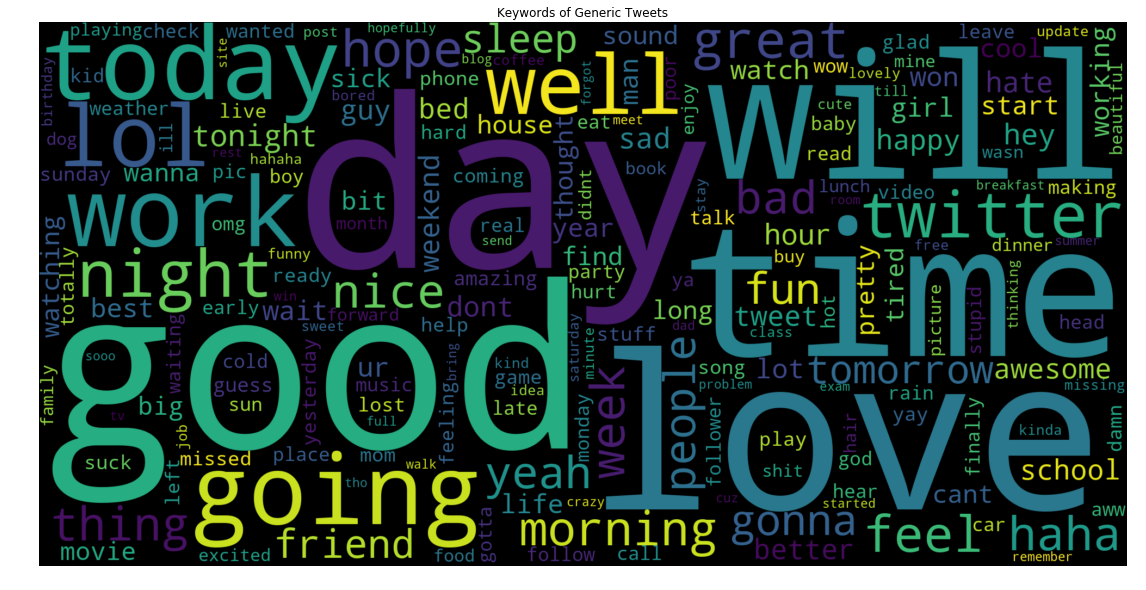

In [16]:
# Word cloud for generic tweet
gen_cloud = cleaned_data_gen
gen_cloud = ''.join([x for x in gen_cloud])
wordcloud_gen = WordCloud(width = 2000, height = 1000).generate(gen_cloud)

plt.figure(figsize = (20,10))
plt.title('Keywords of Generic Tweets')
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis("off")
plt.show()

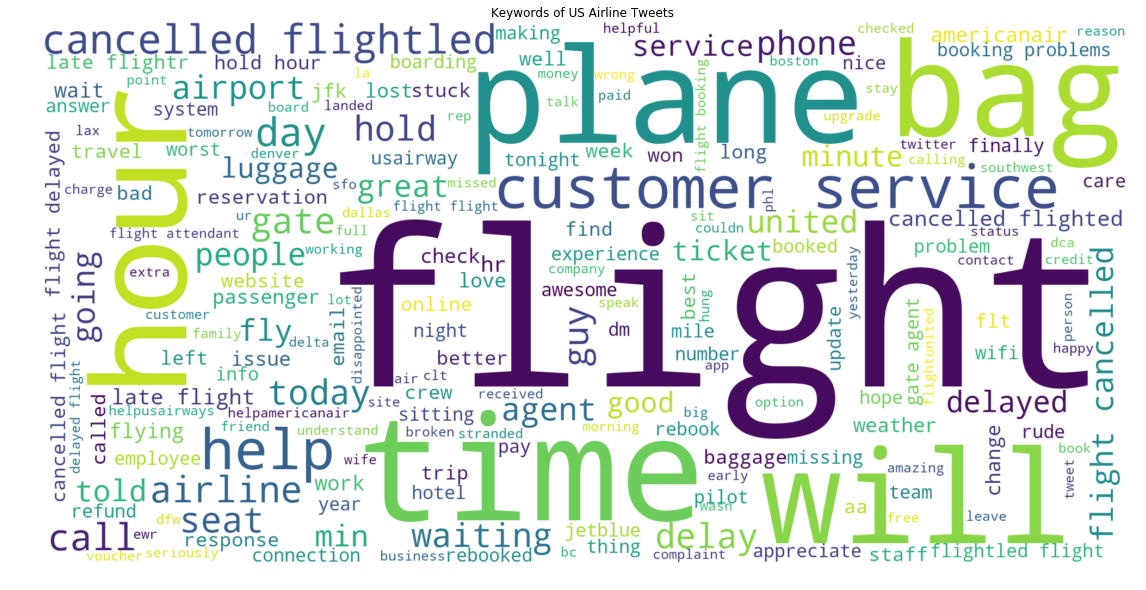

In [17]:
# Word cloud for us airline
Airline_cloud = cleaned_data
Airline_cloud = ''.join([x for x in Airline_cloud])
wordcloud_air = WordCloud(width =2000, height = 1000,background_color="white").generate(Airline_cloud)

plt.figure(figsize = (20,10))
plt.title('Keywords of US Airline Tweets')
plt.imshow(wordcloud_air, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#Frequency of words.
wordcloud_gen.words_

{'day': 1.0,
 'good': 0.9253652525963739,
 'love': 0.8384087308572434,
 'time': 0.8186938919204365,
 'will': 0.808836472452033,
 'today': 0.7905298362964267,
 'going': 0.7882415067769759,
 'work': 0.7810244675233233,
 'lol': 0.6079915507833128,
 'well': 0.5594085548318958,
 'night': 0.5069530012321775,
 'twitter': 0.4868861116000704,
 'great': 0.442879774687555,
 'hope': 0.4168280232353459,
 'feel': 0.4053863756380919,
 'morning': 0.388487942263686,
 'week': 0.38531948600598487,
 'haha': 0.3726456609751804,
 'nice': 0.3705333568033797,
 'thing': 0.3654286217215279,
 'bad': 0.3508185178665728,
 'yeah': 0.33814469283576837,
 'people': 0.322830487590213,
 'gonna': 0.3157894736842105,
 'fun': 0.31561344833656046,
 'tomorrow': 0.3152613976412603,
 'friend': 0.31420524555535995,
 'sleep': 0.3110367892976589,
 'tonight': 0.30065129378630523,
 'hey': 0.2791762013729977,
 'sad': 0.27495159302939626,
 'hate': 0.26843865516634396,
 'hour': 0.26703045238514345,
 'awesome': 0.25787713430734027,
 'b

In [19]:
#Frequency of words.
wordcloud_air.words_

{'flight': 1.0,
 'time': 0.3348164627363737,
 'plane': 0.27308120133481645,
 'hour': 0.26807563959955505,
 'bag': 0.26696329254727474,
 'will': 0.26195773081201335,
 'customer service': 0.25472747497219134,
 'help': 0.22803114571746386,
 'cancelled flightled': 0.22803114571746386,
 'day': 0.22302558398220246,
 'call': 0.19299221357063404,
 'airline': 0.185761957730812,
 'seat': 0.1735261401557286,
 'gate': 0.1735261401557286,
 'today': 0.16129032258064516,
 'hold': 0.1596218020022247,
 'guy': 0.1596218020022247,
 'delay': 0.15906562847608455,
 'phone': 0.1507230255839822,
 'waiting': 0.1496106785317019,
 'airport': 0.13959955506117908,
 'agent': 0.13681868743047831,
 'united': 0.13236929922135707,
 'people': 0.13181312569521692,
 'going': 0.13125695216907676,
 'great': 0.12791991101223582,
 'flight cancelled': 0.12791991101223582,
 'told': 0.12458286985539488,
 'min': 0.12402669632925473,
 'fly': 0.12235817575083426,
 'delayed': 0.11957730812013348,
 'service': 0.11568409343715239,
 'm

# (3) Model Preparation

Here, I used 1-gram model

In [20]:
#read txt here
gen = pd.read_csv('generic_tweets.txt', sep=",")
#operate data cleaning
cleaned_data_gen,tag_generic = data_cleaning('generic_tweets.txt')
#combine gen_tweets and sentiment
gen_data = pd.DataFrame(columns = ['Tweet','Sentiment'])
gen_data.Tweet = cleaned_data_gen
gen_data.Sentiment = gen['class']
gen_data

,Tweet,Sentiment
0,switchfoot awww bummer shoulda david ca...,0
1,upset update facebook texting cry re...,0
2,kenichan dived times ball managed save 50...,0
3,body feels itchy fire,0
4,nationwideclass behaving mad,0
5,kwesidei crew,0
6,hug,0
7,loltrish hey long time rains bit bit l...,0
8,tatiana_k nope,0
9,twittera muera,0


In [21]:
#CountVectorizer() will give back a matrix that shows the frequency for each word
#vec_gen = CountVectorizer().fit_transform()
vec = CountVectorizer()
vec_fit = vec.fit(gen_data.Tweet)
vec_gen = vec_fit.transform(gen_data.Tweet) #this function count the number of occupancy for each word

In [22]:
len(vec.get_feature_names())

147855

In [23]:
vec.vocabulary_

{'switchfoot': 127067,
 'awww': 12915,
 'bummer': 21560,
 'shoulda': 117979,
 'david': 33943,
 'carr': 23635,
 'third': 131109,
 'day': 34193,
 'upset': 138029,
 'update': 137937,
 'facebook': 44822,
 'texting': 129479,
 'cry': 31671,
 'result': 109484,
 'school': 114675,
 'today': 132765,
 'blah': 17585,
 'kenichan': 71321,
 'dived': 37421,
 'times': 132003,
 'ball': 13882,
 'managed': 81572,
 'save': 114216,
 '50': 2480,
 'rest': 109422,
 'bounds': 19356,
 'body': 18549,
 'feels': 45962,
 'itchy': 63491,
 'fire': 46769,
 'nationwideclass': 92219,
 'behaving': 15595,
 'mad': 80680,
 'kwesidei': 73847,
 'crew': 31300,
 'hug': 59583,
 'loltrish': 78508,
 'hey': 57370,
 'long': 78596,
 'time': 131936,
 'rains': 106856,
 'bit': 17264,
 'lol': 78375,
 'fine': 46652,
 'tatiana_k': 128255,
 'nope': 94852,
 'twittera': 136192,
 'muera': 90312,
 'spring': 122765,
 'break': 19902,
 'plain': 102272,
 'city': 27388,
 'snowing': 120826,
 'pierced': 101616,
 'ears': 40354,
 'caregiving': 23333,
 'c

In [24]:
y_gen=np.array(gen_data.Sentiment)#extract Sentiments
y_gen

array([0, 0, 0, ..., 4, 4, 4])

Randomly separate dataset into training set and test set

In [25]:
# separate dataset into training set and test set.
x_gen_train,x_gen_test,y_gen_train,y_gen_test = train_test_split(vec_gen,y_gen,test_size = 0.30,shuffle = True)

# Model Implementation

1-gram model implementation by using logistic regression with l2 regularization

In [26]:
# Use the Logistic Regression model with L2 regularization
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_gen_train,y_gen_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_gen_test_predict = logreg.predict(x_gen_test)#predict the Sentiment value in the test dataset

#Compare the prediction and the actual value of sentiments in the test dataset
gen_test_frame = pd.DataFrame(columns=['y_gen_test_actual','y_gen_test_pred'])
gen_test_frame.y_gen_test_actual = y_gen_test
gen_test_frame.y_gen_test_pred = y_gen_test_predict
# Printing the actual values and predicted values of sentiments
gen_test_frame

,y_gen_test_actual,y_gen_test_pred
0,4,4
1,0,0
2,4,4
3,4,4
4,4,4
5,4,4
6,4,4
7,0,0
8,0,0
9,4,4


In [28]:
#calculate the confusion matrix
matrix = confusion_matrix(y_gen_test,y_gen_test_predict)
matrix

array([[21256,  8799],
       [ 7068, 22877]])

In [29]:
#this plot function is from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[21256  8799]
 [ 7068 22877]]


<Figure size 432x288 with 0 Axes>

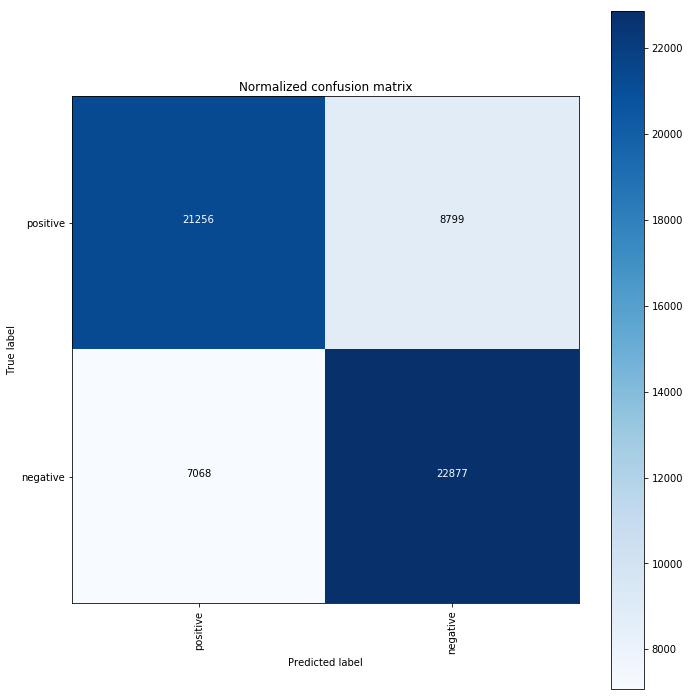

In [30]:
#plot the confusion matrix
class_names = ['positive','negative']
plt.figure()
plot_confusion_matrix(matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

In [31]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics.classification:

accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
   

In [32]:
#the accuracy score can be obtained:
accuracy_score(y_gen_test, y_gen_test_predict)

0.73555

The accuracy of 0.73768 for 1-gram model has been obtained.

# Apply the model on the US Airline

In [33]:
airlines

{'virginamerica': '343',
 'southwestair': '1778',
 'jetblue': '1610',
 'usairways': '2641',
 'united': '3390',
 'americanair': '2443'}

In [34]:
df.text.items()

In [35]:
#Define a new set for US airline, which has categories as follows
airline_set = pd.DataFrame(columns = ['Airline','Tweet','Sentiment','Reason'])

airline=[]
tweet=[]
sentiment=[]
reason=[]
#here, a for-loop has been used. hashtags are used to identify airlines.
for j in airlines:#Get airline information for each tweet, this is a easy way to know which airline is talking about
    for v,i in df.text.iteritems():
        if j in i:
            airline.append(j)
            tweet.append(i)
            sentiment.append(df.sentiment[v])
            reason.append(df.negative_reason[v])
                      
airline_set['Airline'] = airline
airline_set['Tweet'] = tweet
airline_set['Sentiment'] = sentiment
airline_set['Reason'] = reason


In [36]:
airline_set

,Airline,Tweet,Sentiment,Reason
0,virginamerica,virginamerica youve commercials experience...,positive,NaN
1,virginamerica,virginamerica aggressive blast obnoxious en...,negative,Bad Flight
2,virginamerica,virginamerica big bad thing,negative,Can't Tell
3,virginamerica,virginamerica seriously pay 30 flight seats...,negative,Can't Tell
4,virginamerica,virginamerica time fly vx âœear wormâ won...,positive,NaN
5,virginamerica,virginamerica well didntâbut,positive,NaN
6,virginamerica,virginamerica amazing arrived hour early ...,positive,NaN
7,virginamerica,virginamerica lt3 pretty graphics better m...,positive,NaN
8,virginamerica,virginamerica great deal thinking 2nd t...,positive,NaN
9,virginamerica,virginamerica virginmedia flying fabulous se...,positive,NaN


In [37]:
# Converting postive and negative word into 4 and 0 sentiment values, respectively
airline_set.Sentiment[airline_set.Sentiment == 'negative'] = 0
airline_set.Sentiment[airline_set.Sentiment == 'positive'] = 4
airline_set.Sentiment

0        4
1        0
2        0
3        0
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       0
12       4
13       0
14       4
15       4
16       0
17       4
18       4
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       4
27       4
28       4
29       0
        ..
11856    0
11857    0
11858    0
11859    0
11860    0
11861    0
11862    0
11863    0
11864    0
11865    0
11866    4
11867    0
11868    4
11869    0
11870    0
11871    0
11872    4
11873    0
11874    4
11875    0
11876    0
11877    4
11878    0
11879    4
11880    0
11881    0
11882    0
11883    4
11884    0
11885    0
Name: Sentiment, Length: 11886, dtype: object

In [38]:
#Do the same thing as I did for the generic tweets
vec = CountVectorizer()
vec_fit_air = vec.fit(airline_set.Tweet)
vec_us_air = vec_fit.transform(airline_set.Tweet) #this function count the number of occupancy for each word
vec_us_air

<11886x147855 sparse matrix of type '<class 'numpy.int64'>'
	with 88465 stored elements in Compressed Sparse Row format>

In [39]:
#Apply the 1-g model on the us airline dataset.
y_us_predict = logreg.predict(vec_us_air)
y_us = airline_set.Sentiment
#Compare the prediction and the actual value of sentiments in the test dataset
us_test_frame = pd.DataFrame(columns=['y_us_actual','y_us_pred'])
us_test_frame.y_us_actual = y_us
us_test_frame.y_us_pred = y_us_predict
# Printing the actual values and predicted values of sentiments
us_test_frame

,y_us_actual,y_us_pred
0,4,0
1,0,4
2,0,0
3,0,0
4,4,4
5,4,4
6,4,4
7,4,4
8,4,4
9,4,4


In [40]:
y_us.shape,y_us_predict.shape

((11886,), (11886,))

In [41]:
#calculate the accuracy score for the us airline dataset.
accuracy_score(list(y_us), list(y_us_predict))

0.7686353693420831

Accuracy of 0.7536597677940434 obtained on Test data of US airlines Tweets

In [42]:
#calculate confusion matrix
matrix2 = confusion_matrix(list(airline_set.Sentiment),list(y_us_predict))
matrix2

array([[7496, 1990],
       [ 760, 1640]])

Confusion matrix, without normalization
[[7496 1990]
 [ 760 1640]]


<Figure size 432x288 with 0 Axes>

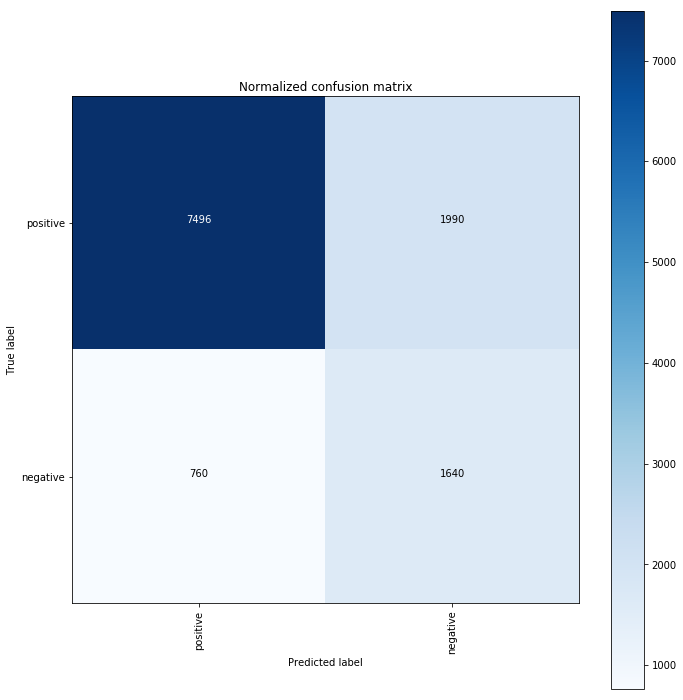

In [43]:
#plot the confusion matrix
plt.figure()
plot_confusion_matrix(matrix2, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

# Consider Negative US airline Tweets

In [44]:
#extract all of negative tweets which has a sentiment = 0.
neg = pd.DataFrame(columns=['neg_tweet','reason','airline'])
neg.neg_tweet = airline_set.Tweet[airline_set.Sentiment == 0]
neg.reason = airline_set.Reason[airline_set.Sentiment == 0]
neg.airline = airline_set.Airline[airline_set.Sentiment == 0]
neg

,neg_tweet,reason,airline
1,virginamerica aggressive blast obnoxious en...,Bad Flight,virginamerica
2,virginamerica big bad thing,Can't Tell,virginamerica
3,virginamerica seriously pay 30 flight seats...,Can't Tell,virginamerica
11,virginamerica sfopdx schedule mia,Late Flight,virginamerica
13,virginamerica flew nyc sfo week fully s...,Bad Flight,virginamerica
16,virginamerica fares three times carr...,Can't Tell,virginamerica
19,virginamerica guys messed seating reserved...,Customer Service Issue,virginamerica
20,virginamerica status match program applied ...,Customer Service Issue,virginamerica
21,virginamerica happened 2 ur vegan food option...,Can't Tell,virginamerica
22,virginamerica amazing cant cold air ve...,Bad Flight,virginamerica


Count the total number of negative tweets for each Airlines respectively

In [45]:
np.sum(neg.airline == 'usairways')

2324

In [46]:
np.sum(neg.airline ==  'united')

2685

In [47]:
np.sum(neg.airline == 'virginamerica')

190

In [48]:
np.sum(neg.airline == 'southwestair')

1209

In [49]:
np.sum(neg.airline == 'americanair')

2104

In [50]:
np.sum(neg.airline == 'jetblue')

974

Using CountVectorizer

In [51]:
#Count the words in negative tweets
vec = CountVectorizer()
us_negdata = vec.fit_transform(neg.neg_tweet)
us_negdata

<9486x11603 sparse matrix of type '<class 'numpy.int64'>'
	with 85422 stored elements in Compressed Sparse Row format>

In [52]:
#check the length of feature names
len(vec.get_feature_names())

11603

In [53]:
#name of features and the number for each feautre
vec.vocabulary_

{'virginamerica': 11017,
 'aggressive': 1526,
 'blast': 2245,
 'obnoxious': 7635,
 'entertainment': 4118,
 'guests': 5110,
 'faces': 4332,
 'amp': 1671,
 'recourse': 8643,
 'big': 2204,
 'bad': 2025,
 'thing': 10219,
 'seriously': 9288,
 'pay': 7965,
 '30': 595,
 'flight': 4549,
 'seats': 9224,
 'didnt': 3671,
 'playing': 8150,
 'flying': 4667,
 'va': 10951,
 'sfopdx': 9330,
 'schedule': 9169,
 'mia': 7102,
 'flew': 4536,
 'nyc': 7622,
 'sfo': 9321,
 'week': 11197,
 'fully': 4837,
 'sit': 9467,
 'seat': 9216,
 'large': 6552,
 'gentleman': 4905,
 'side': 9428,
 'help': 5250,
 'fares': 4382,
 'three': 10250,
 'times': 10297,
 'carriers': 2606,
 'select': 9251,
 'guys': 5122,
 'messed': 7082,
 'seating': 9221,
 'reserved': 8849,
 'friends': 4787,
 'ðÿ': 11581,
 'free': 4766,
 'internet': 6185,
 'status': 9766,
 'match': 6976,
 'program': 8388,
 'applied': 1779,
 'weeks': 11203,
 'called': 2539,
 'emailed': 4042,
 'response': 8866,
 'happened': 5171,
 'ur': 10892,
 'vegan': 10979,
 'food':

In [54]:
#Summary reasons for negative tweets: same tricks, list of list to a list.
neg_reason = list(set(list(neg.reason)))
list_neg = neg_reason
neg_reason

['Lost Luggage',
 'longlines',
 'Bad Flight',
 'Flight Attendant Complaints',
 "Can't Tell",
 'Cancelled Flight',
 'Customer Service Issue',
 'Damaged Luggage',
 'Flight Booking Problems',
 'Late Flight']

In [55]:
#convert the categories into numeric values.
neg.reason.replace(list_neg,[0,1,2,3,4,5,6,7,8,9])

1        2
2        4
3        4
11       9
13       2
16       4
19       6
20       6
21       4
22       2
23       8
24       6
25       6
29       6
31       8
35       8
38       6
40       6
41       9
43       0
44       3
47       6
48       6
50       9
51       4
52       4
53       8
54       4
55       5
56       9
        ..
11849    6
11850    6
11851    9
11852    5
11853    9
11854    5
11855    5
11856    8
11857    5
11858    5
11859    3
11860    1
11861    5
11862    6
11863    6
11864    5
11865    5
11867    2
11869    6
11870    6
11871    9
11873    4
11875    9
11876    5
11878    6
11880    2
11881    5
11882    9
11884    6
11885    6
Name: reason, Length: 9486, dtype: int64

In [56]:
#Separate the dataset into training set and test set
n_reason = np.array(neg.reason)
x_us_train,x_us_test,y_us_train,y_us_test = train_test_split(us_negdata,n_reason,test_size=0.30,shuffle=True)

In [57]:
#train the model by using logist regression with l2 regularization
logreg.fit(x_us_train,list(y_us_train))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
#Predict the value of y
y_pred = logreg.predict(x_us_test)
y_pred

array(['Flight Booking Problems', 'Bad Flight', "Can't Tell", ...,
       'Late Flight', 'Customer Service Issue', 'Customer Service Issue'],
      dtype='<U27')

In [59]:
#Compare the prediction and the actual value of sentiments in the test dataset
frame = pd.DataFrame(columns=['actual_reason','predicted_reason'])
frame.actual_reason = y_us_test
frame.predicted_reason = y_pred
# Printing the actual values and predicted values of sentiments
frame

,actual_reason,predicted_reason
0,Late Flight,Flight Booking Problems
1,Cancelled Flight,Bad Flight
2,Can't Tell,Can't Tell
3,Customer Service Issue,Customer Service Issue
4,Late Flight,Late Flight
5,Customer Service Issue,Lost Luggage
6,Customer Service Issue,Customer Service Issue
7,Late Flight,Late Flight
8,Flight Attendant Complaints,Customer Service Issue
9,Lost Luggage,Lost Luggage


In [60]:
#Calculate the accuracy score
accuracy_score(list(y_us_test),list(y_pred))

0.6166549543218552

In [61]:
#Convert the numeric value back to the catogries items
cframe = frame.replace([0,1,2,3,4,5,6,7,8,9],list_neg)
cframe

,actual_reason,predicted_reason
0,Late Flight,Flight Booking Problems
1,Cancelled Flight,Bad Flight
2,Can't Tell,Can't Tell
3,Customer Service Issue,Customer Service Issue
4,Late Flight,Late Flight
5,Customer Service Issue,Lost Luggage
6,Customer Service Issue,Customer Service Issue
7,Late Flight,Late Flight
8,Flight Attendant Complaints,Customer Service Issue
9,Lost Luggage,Lost Luggage


In [62]:
#calculate the confusion matrix
matrix3 = confusion_matrix(list(y_us_test),list(y_pred))
matrix3

array([[ 68,  26,   1,  32,   0,   4,   4,  30,   6,   1],
       [ 10, 173,   2, 110,   0,   7,  15,  24,   7,   3],
       [  7,  15, 199,  41,   0,   6,   5,  20,   4,   0],
       [ 14,  84,  32, 655,   0,  21,  24,  29,  21,   1],
       [  0,   5,   0,   8,   2,   1,   0,   0,  10,   0],
       [  7,  16,   2,  48,   0,  50,   0,  18,   9,   2],
       [  5,  18,   5,  56,   0,   0,  74,   5,   2,   0],
       [ 11,  56,   6,  63,   0,   4,   3, 380,  11,   5],
       [  0,  23,   0,  25,   0,   6,   0,  10, 147,   0],
       [  2,   4,   1,  18,   0,   2,   1,  12,   5,   7]])

Confusion matrix, without normalization
[[ 68  26   1  32   0   4   4  30   6   1]
 [ 10 173   2 110   0   7  15  24   7   3]
 [  7  15 199  41   0   6   5  20   4   0]
 [ 14  84  32 655   0  21  24  29  21   1]
 [  0   5   0   8   2   1   0   0  10   0]
 [  7  16   2  48   0  50   0  18   9   2]
 [  5  18   5  56   0   0  74   5   2   0]
 [ 11  56   6  63   0   4   3 380  11   5]
 [  0  23   0  25   0   6   0  10 147   0]
 [  2   4   1  18   0   2   1  12   5   7]]


<Figure size 432x288 with 0 Axes>

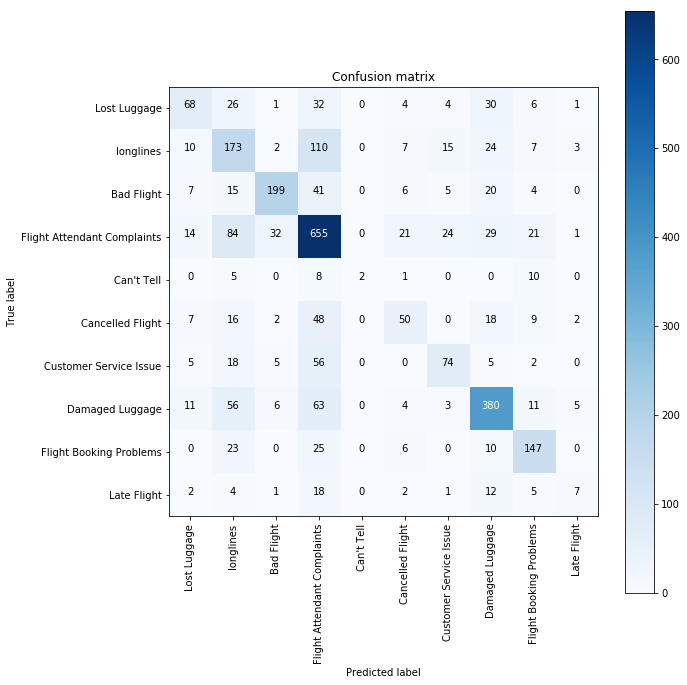

In [63]:
plt.figure()
plot_confusion_matrix(matrix3, classes=list_neg, normalize=False,
                      title='Confusion matrix')

A breif discussion about the above confusion matrix can be made:

1).Customer service issue and flight attendant complaints are the most two complaints that are mentioned by public tweets. 

2).Flight booking problems may have some relevance to the customer service issue, intuitively, these two kinds of things may be sorted into a same one. Regression model nearly mistook 25% of the total prediction on flighting booking preoblems for the customer service issues.

3).The accuracy score is only 0.6173 that shows the prediction made is not well. There are some reasons that may cause this inaccuracy: the "Can't tell" does not give such a useful information. This term, in my opinion, makes the model confussed. By checking the confusion matrix, the numbers in the "Can't Tell" row are almost even. "Can't Tell" might be removed and the results would be improved.

# Results:

A brief conclusion:

Customer service issue and flight attendant complaints are the most two serious problems in US airlines. US airlines should focus on these two problems. Usairways recieved 2324 negative tweets, United recieved 2685 negative tweets, Virginamerica recieved 190 negative tweets, Southwestair received 1209 negative tweets, Americanair received 2104 negative tweets and Jetblue received 974 negative tweets. In the aspect of the total amount of negative tweets, United is the most complained and Usairways is the second. A suggestion might be made to gestures: Choosing Virginamerica or Jetblue may be better.

For the first model, an accuracy of 0.75 is obtained for US airlines dataset and an accuracy of 0.73 is obtained for Generic tweet dataset. These two accuracies are based on the 1-gram model and using logistic regression so that in order to improve the accuracy, higher order of n-gram model, e.g 2-gram model or 3-gram model, can be implemented. Because the 2-gram model or 3-gram model consider 2 words or 3 words as a input feature instead of a word. Breifly, a feature might be described more precisely with 2 words or 3 words: for an instance, 'gg' and 'gg easy' are two memes, gg means 'good game', usually used as a polite remark uttered the end of a round or a game; however, 'gg easy' is the most unsportmanslike thing you can ever say after a game. 'gg' is positive but 'gg easy' is definitely not. The accuracy, therefore, might get improved if I use 2-gram model instead of 1-gram model.